In [1]:
# \\DISC
cwd = "..\\..\\"
cwd_Images_Raw = cwd + "\\Sentinel-2 Images Raw"
cwd_Images_Processed = cwd + "\\Sentinel-2 Images Processed"

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Read .csv
df = pd.read_excel(cwd + "//Flox_sites_table_final.xlsx")
df.head()

,Number,Site code,Site name,Country,LAT,LON,Main ecosystem,FLOX Active,Homogeneity test passed,Network,Link
0,1,AT-Mmg,Mieming,Austria,47.3167,10.9702,Forest,Yes,Yes,NaN,https://www.europe-fluxdata.eu/home/site-detai...
1,2,BE-Bra,Brasschaat,Belgium,51.3077,4.5198,Forest,Yes,Yes,ICOS,https://meta.icos-cp.eu/resources/stations/ES_...
2,3,BE-WAL,BE - WAL,Belgium,50.5516,4.7461,Crop,No,No,NaN,https://essd.copernicus.org/articles/16/1283/2...
3,4,NaN,Tapajos KM67,Brasil,-2.8567,-54.9589,Forest,Planned,Yes,NaN,NaN
4,5,CANADA-ONT,Ontario,Canada,42.7102,-80.3573,Forest,Yes,Yes,NaN,NaN


In [6]:
# Filter the sites which passed homogeneity test
df_Passed = df[df['Homogeneity test passed'] == 'Yes']
df_Passed.head()

,Number,Site code,Site name,Country,LAT,LON,Main ecosystem,FLOX Active,Homogeneity test passed,Network,Link
0,1,AT-Mmg,Mieming,Austria,47.3167,10.9702,Forest,Yes,Yes,NaN,https://www.europe-fluxdata.eu/home/site-detai...
1,2,BE-Bra,Brasschaat,Belgium,51.3077,4.5198,Forest,Yes,Yes,ICOS,https://meta.icos-cp.eu/resources/stations/ES_...
3,4,NaN,Tapajos KM67,Brasil,-2.8567,-54.9589,Forest,Planned,Yes,NaN,NaN
4,5,CANADA-ONT,Ontario,Canada,42.7102,-80.3573,Forest,Yes,Yes,NaN,NaN
7,8,CHINA-FOR 1,CHINA - FOR 1,China,26.7416,115.0579,Forest,Not known,Yes,NaN,NaN


In [11]:
# Group by the main ecosystem
df_Passed_Grouped = df_Passed.groupby('Main ecosystem').count()
df_Passed_Grouped = df_Passed_Grouped.reset_index()
df_Passed_Grouped

,Main ecosystem,Number,Site code,Site name,Country,LAT,LON,FLOX Active,Homogeneity test passed,Network,Link
0,Crop,3,3,3,3,3,3,3,3,1,1
1,Forest,23,22,23,23,23,23,23,23,5,7
2,Grasslands,1,1,1,1,1,1,1,1,1,1
3,Savannah,3,3,3,3,3,3,3,3,0,0
4,Tundra,2,2,2,2,2,2,2,2,0,0


In [12]:
df_Passed_Grouped['Number']

0     3
1    23
2     1
3     3
4     2
Name: Number, dtype: int64

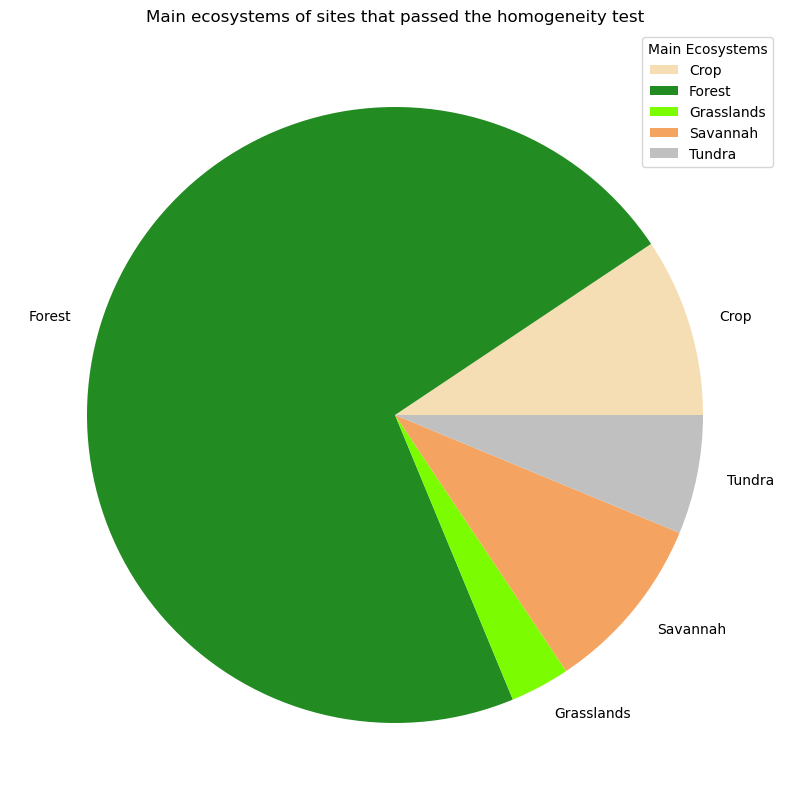

In [31]:
mycolors = ["wheat", "forestgreen", "lawngreen", "sandybrown","silver"]
plt.figure(figsize=(10,10))
plt.title("Main ecosystems of sites that passed the homogeneity test")
plt.pie(df_Passed_Grouped['Number'], labels = df_Passed_Grouped['Main ecosystem'], colors = mycolors)
plt.legend(title = 'Main Ecosystems')
plt.show() 

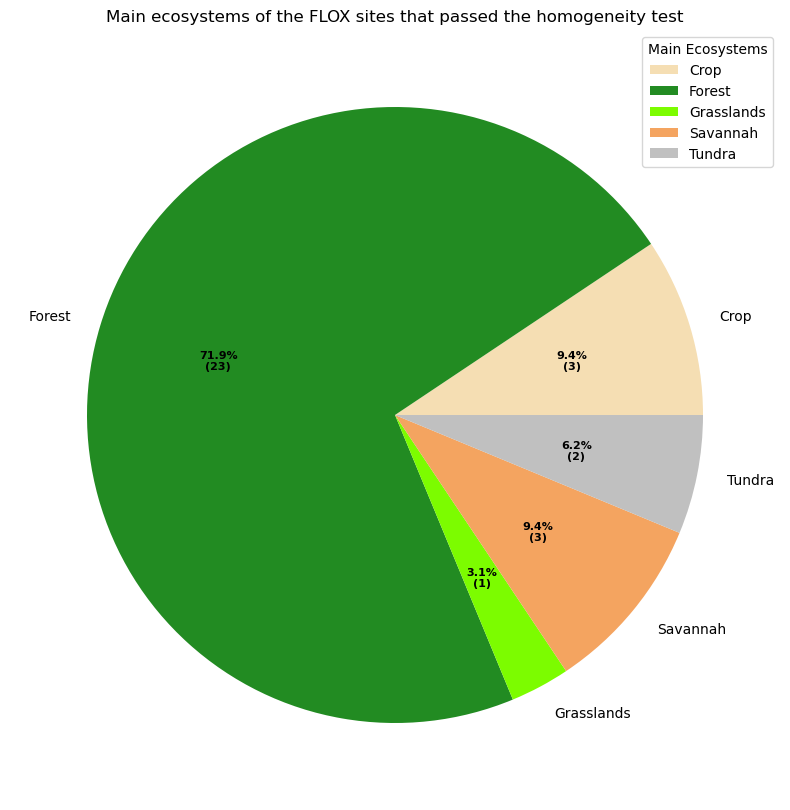

In [39]:
# Creating autocpt arguments


def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)


# Creating plot
fig, ax = plt.subplots(figsize=(10, 10))
wedges, texts, autotexts = ax.pie(df_Passed_Grouped['Number'],
                                  autopct=lambda pct: func(pct, df_Passed_Grouped['Number']),
                                  labels=df_Passed_Grouped['Main ecosystem'],
                                  shadow=False,
                                  colors=mycolors,
                                  startangle=0,
                                  wedgeprops={'linewidth': 0, 'edgecolor': "green"},
                                  textprops=dict(color="black"))



plt.setp(autotexts, size=8, weight="bold")
ax.set_title("Main ecosystems of the FLOX sites that passed the homogeneity test")

# show plot
ax.legend(wedges, df_Passed_Grouped['Main ecosystem'],
          title="Main Ecosystems",
          loc="upper right")
plt.show()

In [38]:
# Group by test-passed and test-failed
df_Test_Grouped = df.groupby('Homogeneity test passed').count()
df_Test_Grouped = df_Test_Grouped.reset_index()
df_Test_Grouped.head()

,Homogeneity test passed,Number,Site code,Site name,Country,LAT,LON,Main ecosystem,FLOX Active,Network,Link
0,No,24,24,24,24,24,24,24,24,3,3
1,Yes,32,31,32,32,32,32,32,32,7,9


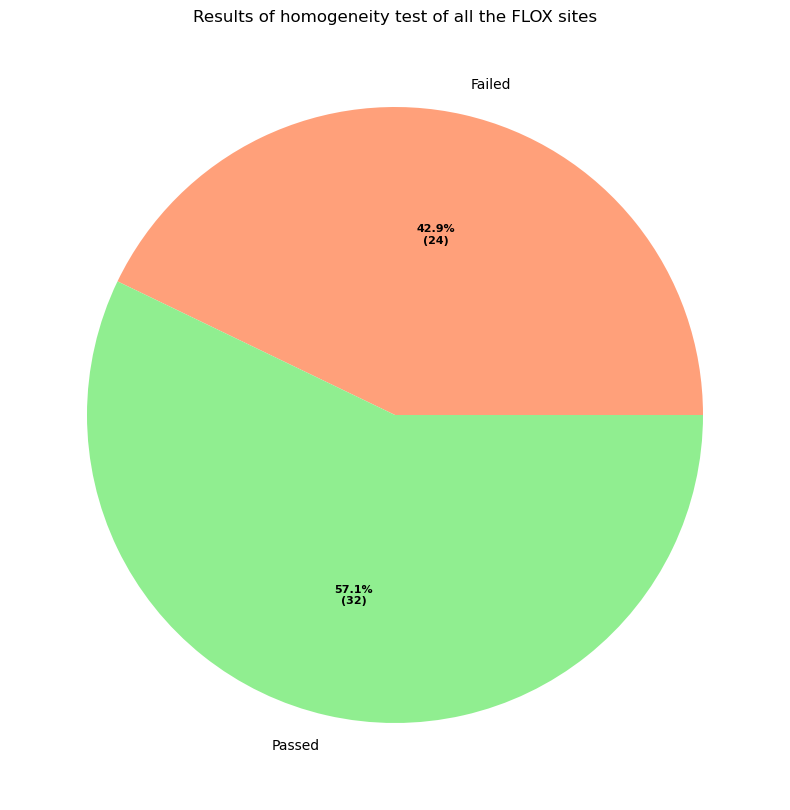

In [51]:
# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)


# Creating plot
fig, ax = plt.subplots(figsize=(10, 10))
wedges, texts, autotexts = ax.pie(df_Test_Grouped['Number'],
                                  autopct=lambda pct: func(pct, df_Test_Grouped['Number']),
                                  labels=['Failed','Passed'],
                                  shadow=False,
                                  colors=["lightsalmon","lightgreen"],
                                  startangle=0,
                                  wedgeprops={'linewidth': 0, 'edgecolor': "green"},
                                  textprops=dict(color="black"))



plt.setp(autotexts, size=8, weight="bold")
ax.set_title("Results of homogeneity test of all the FLOX sites")

# show plot
# ax.legend(wedges, df_Test_Grouped['Homogeneity test passed'],
#           title="Homogeneity Test Results",
#           loc="upper right")
plt.show()

In [52]:
# Group by main ecosystems
df_Eco_Grouped = df.groupby('Main ecosystem').count()
df_Eco_Grouped = df_Eco_Grouped.reset_index()
df_Eco_Grouped.head()

,Main ecosystem,Number,Site code,Site name,Country,LAT,LON,FLOX Active,Homogeneity test passed,Network,Link
0,Crop,20,20,20,20,20,20,20,20,2,3
1,Forest,27,26,27,27,27,27,27,27,7,8
2,Grasslands,2,2,2,2,2,2,2,2,1,1
3,Savannah,4,4,4,4,4,4,4,4,0,0
4,Tundra,2,2,2,2,2,2,2,2,0,0


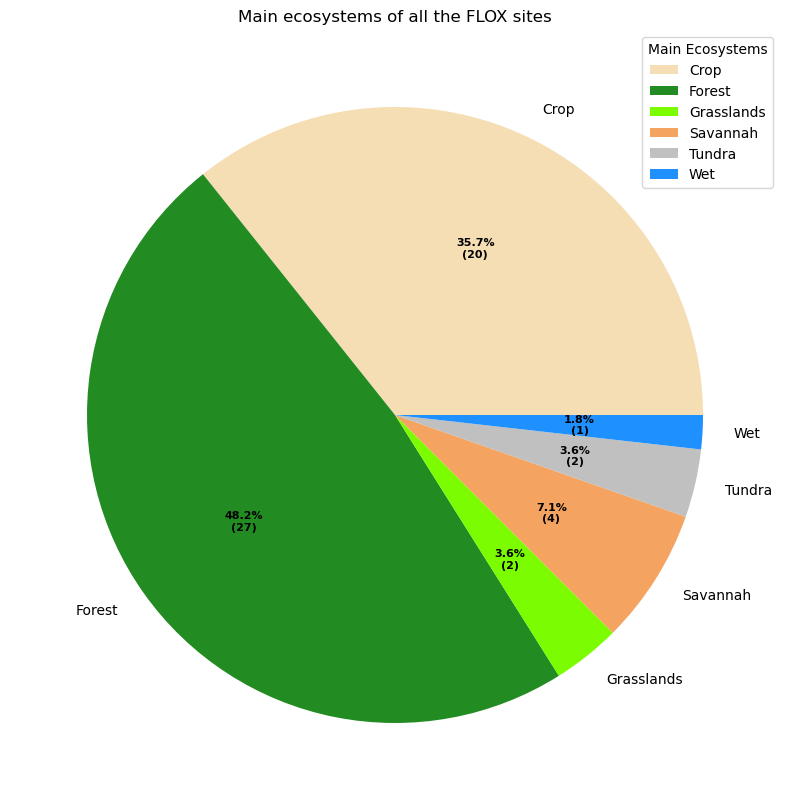

In [54]:
mycolors = ["wheat", "forestgreen", "lawngreen", "sandybrown","silver","dodgerblue"]


def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)


# Creating plot
fig, ax = plt.subplots(figsize=(10, 10))
wedges, texts, autotexts = ax.pie(df_Eco_Grouped['Number'],
                                  autopct=lambda pct: func(pct, df_Eco_Grouped['Number']),
                                  labels=df_Eco_Grouped['Main ecosystem'],
                                  shadow=False,
                                  colors=mycolors,
                                  startangle=0,
                                  wedgeprops={'linewidth': 0, 'edgecolor': "green"},
                                  textprops=dict(color="black"))



plt.setp(autotexts, size=8, weight="bold")
ax.set_title("Main ecosystems of all the FLOX sites")

# show plot
ax.legend(wedges, df_Eco_Grouped['Main ecosystem'],
          title="Main Ecosystems",
          loc="upper right")
plt.show()